In [ ]:
import tensorflow as tf #importa o tensorflow
from tensorflow.contrib.learn import DNNClassifier #importa o modelo de Rede neural do tensorflow
import numpy as np
import os

Utilizando  base de dados MNIST, que contém 55 mil dados de treino e 10 mil dados de teste.
Os dados são imagens de 28X28 pixeis, o que nos dá 784 variáveis para colocar na camada de entrada da nossa rede neural. Mas, antes disso, vamos criar uma nova pasta no nosso computador e baixar esses dados nela.

In [7]:
#criando pasta para colocar os dados
if not os.path.exists('tmp'): #se a pasta não existir
    os.makedirs('tmp') #cria a pasta
    
# baixa os dados na pasta criada
from tensorflow.examples.tutorials.mnist import input_data # baixa os dados
data = input_data.read_data_sets("tmp/",one_hot=False) #baixa e carrega os dados já formatados

Extracting tmp/train-images-idx3-ubyte.gz
Extracting tmp/train-labels-idx1-ubyte.gz
Extracting tmp/t10k-images-idx3-ubyte.gz
Extracting tmp/t10k-labels-idx1-ubyte.gz


In [9]:
print(data.train.images.shape) #mostra o formato dos dados de treino
print(data.test.images.shape) #mostra o formato dos dados de test
print(data.train.images) # mostra algumas linhas e colunas dos dados de treino

(55000, 784)
(10000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Acima mostra que os dados de treino são uma tabela de 55 mil linhas, cada uma com uma observação de 784 colunas, (que representam os pixeis de uma imagem). Como na tarefa se encaxa no regime de aprendizado supervisionado, cada imagem vem anotada com um alvo, o dígito que está  nela( e que queremos prever). Podemos acessar os alvos de treino com o comando abaixo:

In [10]:
print(data.train.labels.shape) # mostra o formato dos alvos de treino
print(data.train.labels) # mostra os alvos de treino

(55000,)
[7 3 4 ... 5 6 8]


As anotações da base de treino podem ser entendidas como uma tabela de 55 mil linhas e com uma única coluna. Pelo que vemos acima, nossa primeira imagem é um 7, nossa segunda imagem é um 3 e assim por diante. 

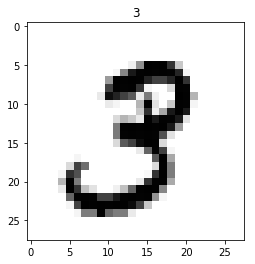

In [13]:
# visualizando a imagem no indice 1
from matplotlib import pyplot as plt

plt.imshow(data.train.images[1].reshape(28,28),cmap='Greys',interpolation='nearest')
plt.title(str(data.train.labels[1])) # anotação do digito
plt.show()

# Definindo os hiper-parâmetros

O primeiro passo é definir os hiper-parâmetros do modelo. Diferentemente dos parâmetros da rede, os w, os hiper-parâmetros não são naturalmente aprendidos durante o treinamento e devem ser ajustados à mão. Alguns dos hiper-parâmetros mais importantes da rede neural são o número de camadas e o número de neurônios em cada camada. Esses hiper-parâmetros definem a capacidade da rede neural e , por meio deles, podemos ajustar o trade-off entre erro por viés e por variância. Quanto maior o número de neurônios, mais potente será a rede neural, mas a probabilidade dela sofrer com sobre-ajustamento será superior

Outros hiper-parâmetros da rede neural são o tamanho do punhado de dados usado durante a otimização e o tamanho do passo dado a cada iteração de treino. Em outras palavras, o tamanho do punhado de dados define quão precisa será nossa estimaiva local da superficie de custo, enquanto que a taxa de aprendizado definirá o tamanho do passo em cada dscida nessa superfície de custo.

Outro detalhe importante é que a rede neural que será construida não tem apenas um neurônio na camada de saída, mas 10 neurônios. Cada neurônio representará a probabilidade da imagem conter um dos dígitos de 0 a 9

In [14]:
# definindo constantes 
lr = 0.01 # taxa de aprendizado
n_iter = 1000 # numero de iterações de treino
batch_size = 128 # qtd. de imagens no punhado de dados
n_inputs = 28 * 28 # número de variáveis (pixeis)
n_l1 = 512 # número de neurônios da primeria camada
n_l2 = 512 # número de neurônios da segunda camada
n_outputs = 10 # número de neurônios da camada de saída